# En esta Notebook veremos el siguiente contenido:

* Wordcloud (Nube de Palabras)
** Del total de los datos sin quitar stopwords
** Del total de los datos removiendo stopwords
** Por cada categoría habiendo quitado stopwords
** Incluyendo n-gramas (Unigramas y bigramas)



In [ ]:
# Importamos las librerías necesarias
import pandas as pd
#from google.colab import drive

!pip install -q gdown
import gdown
import re

# Montamos Google Drive
#drive.mount('/content/drive')

In [ ]:
# Como sabemos que encoding tiene un archivo:

import chardet

# Abrimos el archivo en modo binario para analizar los primeros 10.000 bytes
with open('/content/drive/MyDrive/CODERHOUSE/EZE - Data Science III_ NLP & Deep Learning aplicado a Ciencia de Datos/BASE DE DATOS/IMDB_esp.csv', 'rb') as f:
    result = chardet.detect(f.read(10000))

print(result)


{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}


In [ ]:
# OPCIÓN 1: Importando con csv almacenado en mi Google Drive
"""# Leemos el archivo CSV con pandas.

df = pd.read_csv('/content/drive/MyDrive/CODERHOUSE/EZE - Data Science III_ NLP & Deep Learning aplicado a Ciencia de Datos/BASE DE DATOS/IMDB_esp.csv')

# Mostramos las primeras filas del DataFrame
df.head(20)"""

"# Leemos el archivo CSV con pandas.\n\ndf = pd.read_csv('/content/drive/MyDrive/CODERHOUSE/EZE - Data Science III_ NLP & Deep Learning aplicado a Ciencia de Datos/BASE DE DATOS/IMDB_esp.csv')\n\n# Mostramos las primeras filas del DataFrame\ndf.head(20)"

In [ ]:
# OPCIÓN 2: Utilizamos gdown para que cada usuario que acceda a la notebook acceda a los datos sin necesidad de subir el dataset manualmente a su dispositivo.
"""# https://drive.google.com/file/d/1DudhDzBrbOJthWXlOyyW1hvFfG3LaIaS/view?usp=drive_link


# ID del archivo compartido en Google Drive
file_id = '1DudhDzBrbOJthWXlOyyW1hvFfG3LaIaS'
url = f'https://drive.google.com/uc?id={file_id}'

# Descargamos el archivo con gdown
gdown.download(url, 'IMDB_esp.csv', quiet=False)

# Leemos el archivo CSV descargado
df = pd.read_csv('IMDB_esp.csv', encoding='UTF-8')

# Mostramos las primeras filas
df.head(10)"""

"# https://drive.google.com/file/d/1DudhDzBrbOJthWXlOyyW1hvFfG3LaIaS/view?usp=drive_link\n\n\n# ID del archivo compartido en Google Drive\nfile_id = '1DudhDzBrbOJthWXlOyyW1hvFfG3LaIaS'\nurl = f'https://drive.google.com/uc?id={file_id}'\n\n# Descargamos el archivo con gdown\ngdown.download(url, 'IMDB_esp.csv', quiet=False)\n\n# Leemos el archivo CSV descargado\ndf = pd.read_csv('IMDB_esp.csv', encoding='UTF-8')\n\n# Mostramos las primeras filas\ndf.head(10)"

In [ ]:
# Opción 3: utilizamos regex para que detectar el id. Usamos re.search() (módulo re de expresiones regulares) para buscar cualquier texto entre /d/ y el próximo /.
# Devuelve el ID sin importar que tenga parámetros como ?usp=sharing, etc.
link = 'https://drive.google.com/file/d/1DudhDzBrbOJthWXlOyyW1hvFfG3LaIaS/view?usp=drive_link'

#re.search() es una función que busca un patrón dentro de una cadena de texto.
#r'/d/([a-zA-Z0-9_-]+)' es el patrón que se está buscando. Esto es una expresión regular que busca una secuencia específica de caracteres.
# La expresión busca una parte del texto que comience con "/d/" seguido de letras, números, guiones o guiones bajos
#link es la cadena de texto dentro de la cual se está buscando.
#.group(1) extrae una parte específica del patrón encontrado llamada grupo de captura.

file_id = re.search(r'/d/([a-zA-Z0-9_-]+)', link).group(1)

# Creamos la URL de descarga directa usando el file ID
url = f'https://drive.google.com/uc?id={file_id}'

# Descargamos el archivo con gdown
gdown.download(url, 'IMDB_esp.csv')

# Leemos el archivo CSV descargado en un DataFrame de Pandas
# 'encoding='ISO-8859-1'' especifica la codificación del archivo para evitar errores
df = pd.read_csv('IMDB_esp.csv', encoding='UTF-8')

# Mostramos las primeras 10 filas del DataFrame para una vista previa
df.head(10)

Downloading...
From (original): https://drive.google.com/uc?id=1DudhDzBrbOJthWXlOyyW1hvFfG3LaIaS
From (redirected): https://drive.google.com/uc?id=1DudhDzBrbOJthWXlOyyW1hvFfG3LaIaS&confirm=t&uuid=db040657-59f4-45d0-a453-a9cc02b9f58a
To: /content/IMDB_esp.csv
100%|██████████| 137M/137M [00:01<00:00, 79.7MB/s]


,Unnamed: 0,review_en,review_es,sentiment,sentimiento
0,0,One of the other reviewers has mentioned that ...,Uno de los otros críticos ha mencionado que de...,positive,positivo
1,1,A wonderful little production. The filming tec...,Una pequeña pequeña producción.La técnica de f...,positive,positivo
2,2,I thought this was a wonderful way to spend ti...,Pensé que esta era una manera maravillosa de p...,positive,positivo
3,3,Basically there's a family where a little boy ...,"Básicamente, hay una familia donde un niño peq...",negative,negativo
4,4,"Petter Mattei's ""Love in the Time of Money"" is...","El ""amor en el tiempo"" de Petter Mattei es una...",positive,positivo
5,5,"Probably my all-time favorite movie, a story o...",Probablemente mi película favorita de todos lo...,positive,positivo
6,6,I sure would like to see a resurrection of a u...,Seguro que me gustaría ver una resurrección de...,positive,positivo
7,7,"This show was an amazing, fresh & innovative i...","Este espectáculo fue una idea increíble, fresc...",negative,negativo
8,8,Encouraged by the positive comments about this...,Alentados por los comentarios positivos sobre ...,negative,negativo
9,9,If you like original gut wrenching laughter yo...,"Si te gusta la risa original desgarradora, te ...",positive,positivo


In [ ]:
df = df[["review_es","sentimiento"]] # Almacenamos los datos como df resguardando solo la versión de los términos en español

# Wordcloud sin quitar Stopwords.

In [ ]:
# Importamos las librerías necesarias

from wordcloud import WordCloud
import matplotlib.pyplot as plt

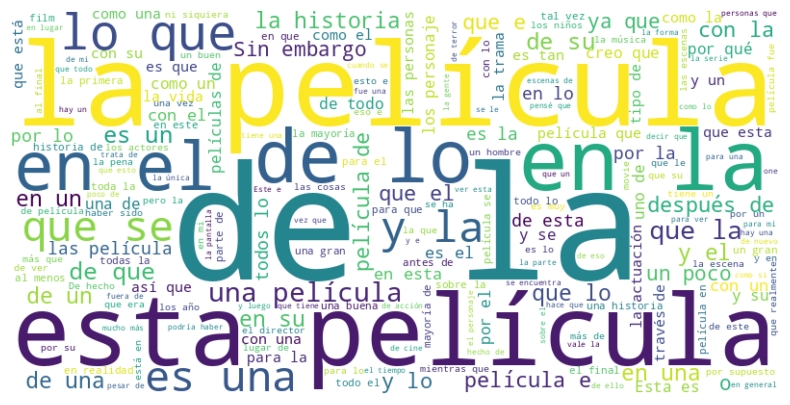

In [ ]:
# Unir todo el texto de la columna 'review_es'

#Esto es necesario porque la WordCloud genera la nube de palabras a partir de
# una única cadena de texto, y no puede procesar una columna de DataFrame directamente.

text = ' '.join(df['review_es'])

# Generar la WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
# Crea un objeto WordCloud con un ancho de 800 píxeles, altura de 400, y fondo blanco.
# El método 'generate' crea la nube de palabras a partir del texto dado.

# Mostrar la WordCloud
plt.figure(figsize=(10, 5))
# Crea una figura de tamaño 10x5 pulgadas para la visualización de la nube.

plt.imshow(wordcloud, interpolation='bilinear')
# Muestra la nube de palabras en la figura, usando interpolación bilineal para suavizarla.

plt.axis('off')
# Oculta los ejes de la figura para una mejor visualización.

plt.show()
# Muestra la figura en pantalla.

# Wordcloud removiendo stopwords

In [ ]:
# Importamos las stopwords de la biblioteca nltk
from nltk.corpus import stopwords

# Importamos nltk para gestionar recursos lingüísticos
import nltk

# Descargamos el paquete de stopwords de nltk
nltk.download('stopwords')

# Creamos un conjunto de stopwords en español
stop_words = list(stopwords.words('spanish'))



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


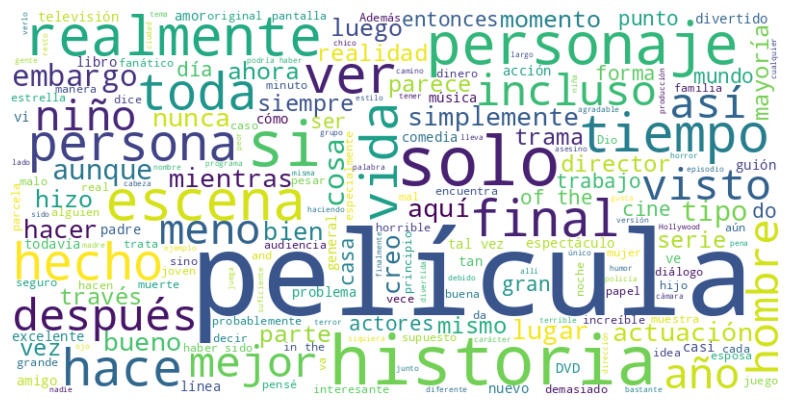

In [ ]:
# Creamos la wordcloud removiendo stopwords
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      stopwords=stop_words).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# Incorporamos palabras a la lista de Stopwords

In [ ]:
# Previsualizamos la lista de stop_words
stop_words

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [ ]:
# Agregamos la palabra 'película' a las stopwords utilizando el método .extend
stop_words.extend(['película','películas','si','asi'])

In [ ]:
# Previsualizamos nuevamente la lista
stop_words[250:]

['fuerais',
 'fueran',
 'fuese',
 'fueses',
 'fuésemos',
 'fueseis',
 'fuesen',
 'sintiendo',
 'sentido',
 'sentida',
 'sentidos',
 'sentidas',
 'siente',
 'sentid',
 'tengo',
 'tienes',
 'tiene',
 'tenemos',
 'tenéis',
 'tienen',
 'tenga',
 'tengas',
 'tengamos',
 'tengáis',
 'tengan',
 'tendré',
 'tendrás',
 'tendrá',
 'tendremos',
 'tendréis',
 'tendrán',
 'tendría',
 'tendrías',
 'tendríamos',
 'tendríais',
 'tendrían',
 'tenía',
 'tenías',
 'teníamos',
 'teníais',
 'tenían',
 'tuve',
 'tuviste',
 'tuvo',
 'tuvimos',
 'tuvisteis',
 'tuvieron',
 'tuviera',
 'tuvieras',
 'tuviéramos',
 'tuvierais',
 'tuvieran',
 'tuviese',
 'tuvieses',
 'tuviésemos',
 'tuvieseis',
 'tuviesen',
 'teniendo',
 'tenido',
 'tenida',
 'tenidos',
 'tenidas',
 'tened',
 'película',
 'películas',
 'si',
 'asi']

In [ ]:
# Removemos la palabra "sentido" de la lista de stopwords utilizando el método .remove
# No quiero que considere a la palabra "sentido" porque la misma puede hacer alusión a que la película tenga coherencia  o sea verosimil.

stop_words.remove('sentido')

In [ ]:
# Como sería para poder eliminar múltiples palabras. Quiero quitar ""tened" y "sentidos" de la lista de stop_words

for word in ['sentidos', 'tened']:
    stop_words.remove(word)


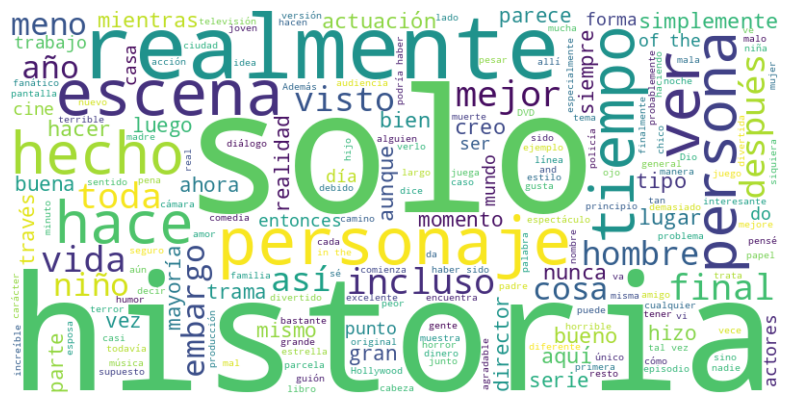

In [ ]:
# Visualizamos el nuevo resultado
# Creamos una nueva wordcloud removiendo stopwords
text = ' '.join(df['review_es'])

# Creamos la wordcloud removiendo stopwords
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      stopwords=stop_words).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# Wordcloud removiendo stopwords de reviews positivas

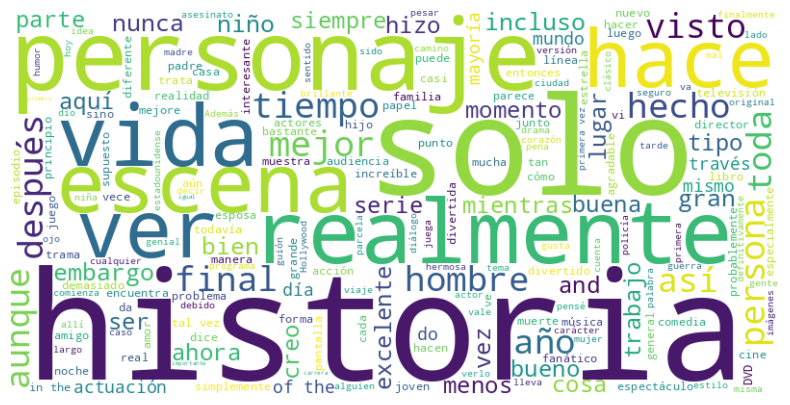

In [ ]:
# Filtrar el DataFrame para solo incluir filas con sentimiento positivo
df_positivo = df[df['sentimiento'] == 'positivo']

# Unir el texto de la columna 'review_es_clean' de los valores positivos
text_positivo = ' '.join(df_positivo['review_es'])

# Crear la wordcloud para los comentarios positivos
wordcloud_positivo = WordCloud(width=800, height=400, background_color='white',
                                stopwords=stop_words).generate(text_positivo)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positivo, interpolation='bilinear')
plt.axis('off')
plt.show()

# Wordcloud removiendo stopwords de reviews negativas

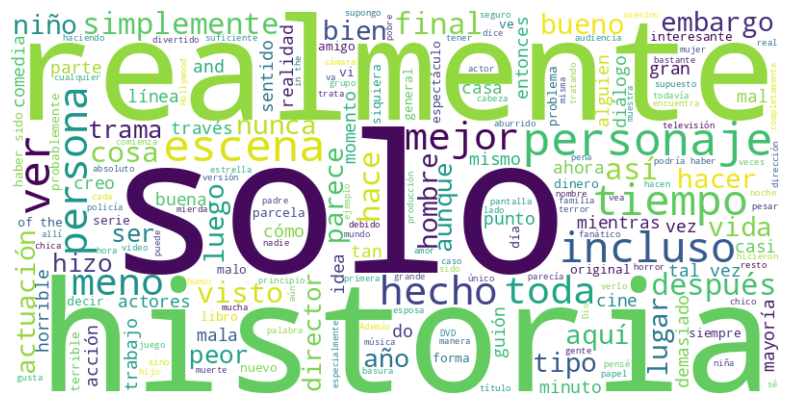

In [ ]:
# Filtrar el DataFrame para solo incluir filas con sentimiento positivo
df_negativo = df[df['sentimiento'] == 'negativo']

# Unir el texto de la columna 'review_es_clean' de los valores positivos
text_negativo = ' '.join(df_negativo['review_es'])

# Crear la wordcloud para los comentarios positivos
wordcloud_negativo = WordCloud(width=800, height=400, background_color='white',
                                stopwords=stop_words).generate(text_negativo)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negativo, interpolation='bilinear')
plt.axis('off')
plt.show()